In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import albumentations as A

import torch

In [2]:
data_path = '../data'

In [3]:
df = pd.read_csv(os.path.join(data_path, 'train_labels.csv'))

In [4]:
file_ids = df[df.target == 0].sample(2)
file_ids = pd.concat([file_ids, df[df.target == 1].sample(2)], axis=0)
file_ids['image_path'] = file_ids['id'].apply(lambda x: os.path.join(data_path, f'train/{x[0]}/{x}.npy'))
file_ids = file_ids.reset_index(drop=True)
file_ids

,id,target,image_path
0,62ffd4fde4a9,0,../data/train/6/62ffd4fde4a9.npy
1,53e2d67284ec,0,../data/train/5/53e2d67284ec.npy
2,4c690ce85b91,1,../data/train/4/4c690ce85b91.npy
3,b874278affaa,1,../data/train/b/b874278affaa.npy


In [5]:
def get_image(image_path):
    image = np.load(image_path)
    image = image.astype(np.float32)
    image = np.vstack(image).transpose((1, 0))
    return image

In [6]:
def plot_data(example):
    ids = example['id']
    target = example['target']
    array = np.load(example['image_path'])
    fig = plt.figure(figsize=(9, 8))
    for i in range(6):
        ax = fig.add_subplot(6, 1, i+1)
        ax.imshow(array[i].astype('float'), interpolation='nearest', aspect='auto')
        state = 'ON' if i%2 == 0 else 'OFF'
        if i == 0:
            ax.set_title(f'Id: {ids}, target: {target}, state: {state} target', size=16)
        else:
            ax.set_title(f'{state} target', size=16)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.tight_layout()
    plt.show()

In [7]:
def show_image(image, label=0):
    plt.figure(figsize=(14, 8))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Label:{label}', size=16)

In [8]:
def show_processed_image(example):
    image_path = example['image_path']
    image = get_image(image_path)
    show_image(image, label=example['target'])
    plt.show()

## Example 1:

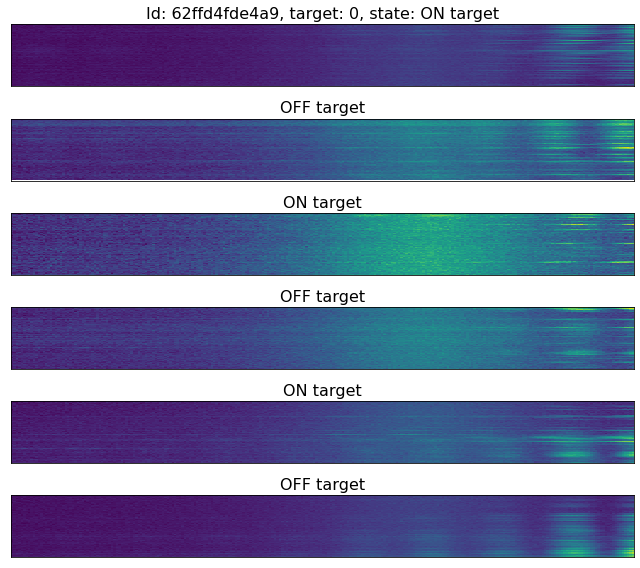

In [9]:
# raw image
plot_data(file_ids.loc[0])

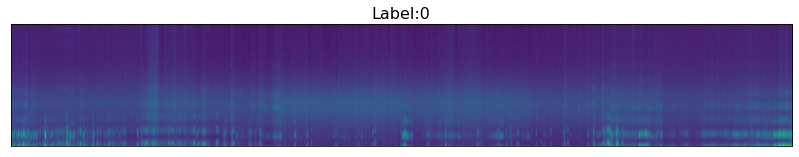

In [10]:
# processed image
show_processed_image(file_ids.loc[0])

## Example 2:

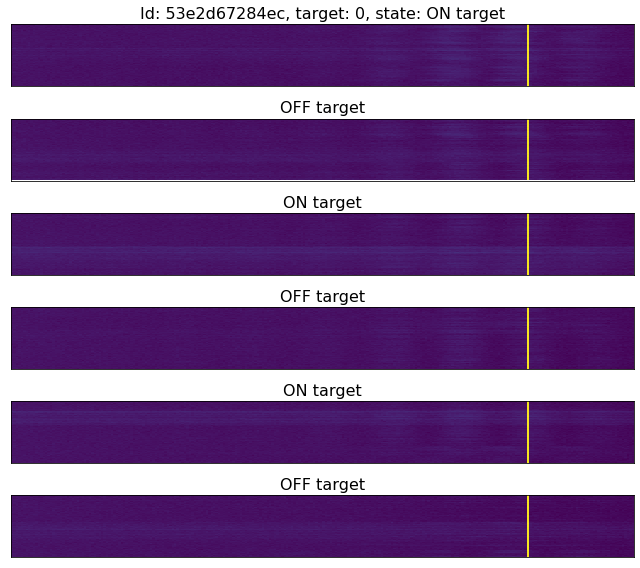

In [11]:
# raw image
plot_data(file_ids.loc[1])

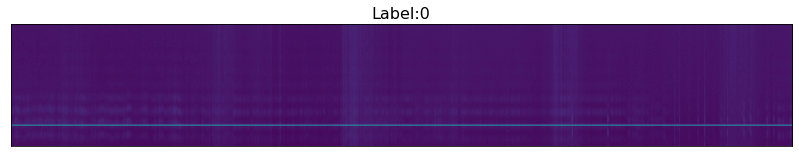

In [12]:
# processed image
show_processed_image(file_ids.loc[1])

## Example 3:

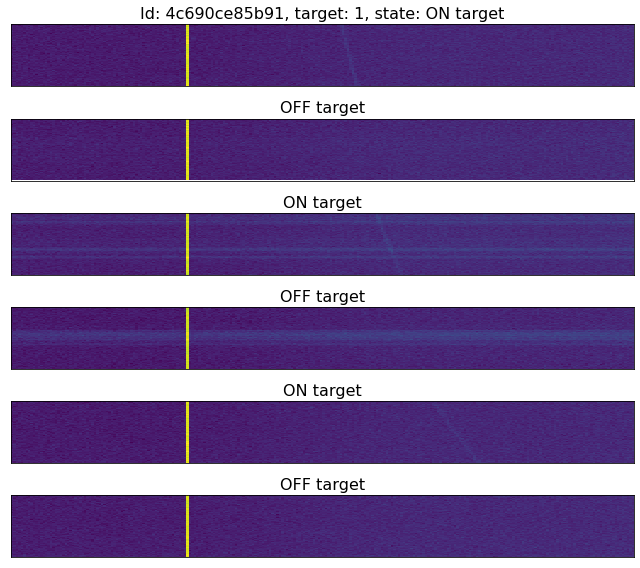

In [13]:
# raw image
plot_data(file_ids.loc[2])

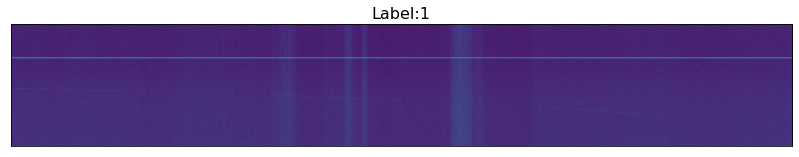

In [14]:
# processed image
show_processed_image(file_ids.loc[2])

## Example 4:

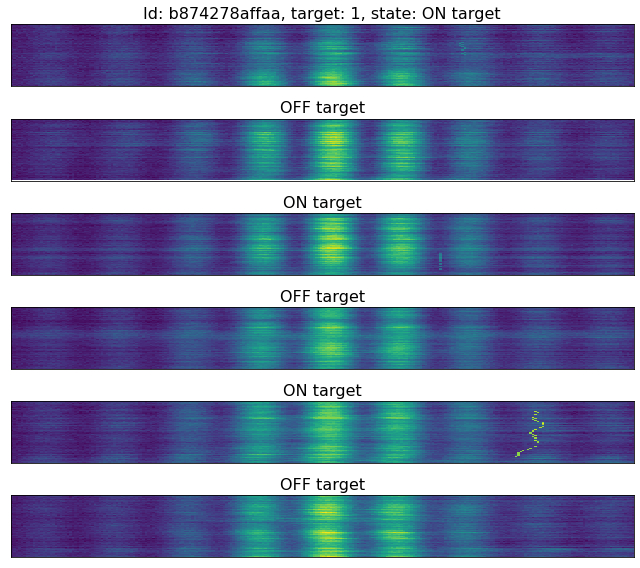

In [15]:
# raw image
plot_data(file_ids.loc[3])

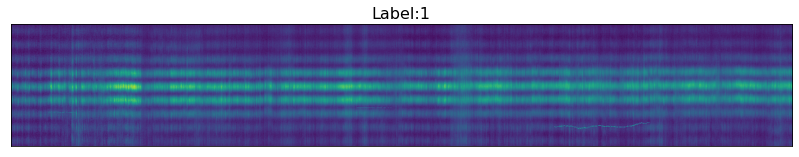

In [16]:
# processed image
show_processed_image(file_ids.loc[3])